# Analyst of Shopping Trends And Customer Behaviour 
## ♦️ **Background**

In this digital era, customer behavior has evolved drastically. This is encouraged by the ease of online shopping and the abundance of product choices. For businesses, understanding shopping trends and customer behavior isn't an option anymore; it's a requirement for being competitive and relevant. Data on customer transactions, product preferences, and online interaction holds precious insights that can reveal buying patterns, identify driving factors of decisions, and predict future needs. By analyzing this data, we can strategize marketing plans more precisely, optimize product offerings, and increase overall customer experience.

## 🔰 **Propose**

This project proposes a deep analysis of the **"Shopping Trends and Customer Behavior Dataset"** to reveal key patterns in customer shopping behavior. Through Exploratory Data Analysis (EDA) and predictive modeling, this project will focus on two main objectives:

1. **Predicting Customer Behavior Trends**
This objective involves exploring various factors that influence customer decisions, including:

    * **Demographic information**: How do different customer demographics impact shopping habits?
    * **Product preferences**: What are the most popular products, and what drives these preferences?
    * **Seasonal influence**: How do seasons affect purchasing patterns?
    * **Promotion strategies**: What is the impact of various promotional activities on customer behavior?
We will address these questions using data visualization and descriptive statistics to extract actionable insights.

2. **Predicting Customer Behavior Trends**
This objective focuses on developing machine learning models to predict important aspects of customer behavior, such as:

    * **Potential shopping volume**: Forecasting future purchasing activity.
    * **Future product interests**: Identifying product categories customers are likely to engage with.
This section will showcase the application of feature engineering, model selection, and predictive model performance evaluation.

Ultimately, this project will not only provide a comprehensive understanding of customer behavior data but also demonstrate my ability to implement data analysis and machine learning techniques to generate strategic insights for businesses.

# 📁**Load data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/shopping-trends-and-customer-behaviour-dataset/Shopping Trends And Customer Behaviour Dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/shopping-trends-and-customer-behaviour-dataset/Shopping Trends And Customer Behaviour Dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.nunique()

Unnamed: 0                3900
Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

print(f"numerical columns : {list(numerical_cols)}")
print(f"categorical columns : {list(categorical_cols)}")

numerical columns : ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
categorical columns : ['Gender', 'Item Purchased', 'Category', 'Location', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


The dataset is remarkably clean, containing no missing values. Consequently, data cleaning is not required, allowing us to move immediately to the subsequent analytical stages.

# 📊**Exploratory Data Analysis (EDA)**

In this section, we will focus on answering the following questions::
* **Demographics & Shopping Behavior:**
    - How do age and gender influence the quantity of purchases and the types of items bought?
    - Are there any differences in shopping behavior across various locations?
* **Product Preferences:**
    - What are the most purchased items/products?
    - What is the most popular color among purchased items?
    - Is there any correlation between review ratings and buying frequency or total purchase amount?
* **Buying Motivation Factors:**
    - Do applied discounts or used promo codes significantly affect the number of purchases or purchasing frequency?
    - How do seasons affect the types of items purchased or the total number of purchases?
    - What are the most frequently used payment methods, and is there any correlation with transaction numbers?
* **Loyalty & Frequency**
    - Is there any difference in the behavior patterns of subscription customers?
    - How is the frequency of purchases correlated with the total number of purchases?

## 🛒 Demographics & Shopping

### 🧓 Distribution of Customer Age

In [15]:
import plotly.express as px

fig = px.histogram(
    df, 
    x="Age", 
    nbins=10, 
    title='Distribution of Customer Age',
    labels={'Age': 'Age'},  # Label sumbu x
    opacity=0.7,  # Opacity bar
    marginal="rug",  # Menambahkan rug plot di atas
    histnorm='probability density'  
)

# Menambahkan garis KDE 
fig.update_traces(
    marker=dict(line=dict(width=1, color='gray')),  # Garis outline bar
    selector=dict(type='histogram')
)

from scipy.stats import gaussian_kde

if 'kde' in df.columns:  # Jika sudah ada kolom KDE, hapus
    df.drop('kde', axis=1, inplace=True)

kde = gaussian_kde(df['Age'].dropna())
x_vals = np.linspace(df['Age'].min(), df['Age'].max(), 100)
y_vals = kde(x_vals)

# Menyesuaikan layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    hovermode="x",  # Menampilkan info saat hover
    showlegend=True
)

fig.add_trace(
    px.line(x=x_vals, y=y_vals, color_discrete_sequence=['red']).data[0]
)

fig.show()


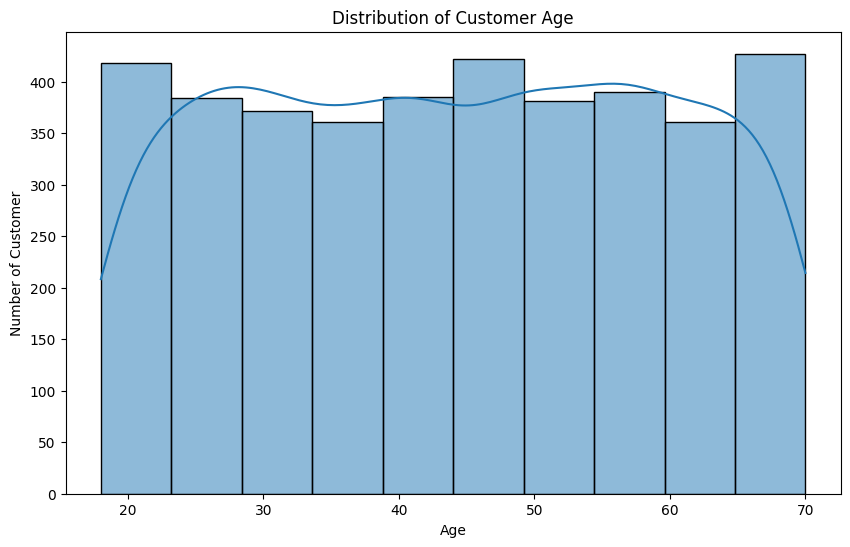

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=10, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

The graph indicates an even distribution of customer ages, suggesting that no particular age group is dominant.

### 💸 Purchase by Age
With 53 unique age values, the current data is complex and difficult to analyze effectively. Therefore, I propose grouping these ages into specific ranges. This approach will provide a clearer overview and significantly simplify the analysis.

In [19]:
#create a new categorical variable by grouping the existing age data.
bins = [18, 25, 35, 45, 55, 65, df['Age'].max()+1]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

avg_purchases_by_age_group = df.groupby('Age_Group')['Previous Purchases'].mean().reset_index()
print(avg_purchases_by_age_group)

  Age_Group  Previous Purchases
0     18-24           24.224280
1     25-34           25.035762
2     35-44           25.475995
3     45-54           24.925532
4     55-64           26.114514
5       65+           26.388759


In [21]:
fig = px.bar(
    avg_purchases_by_age_group,
    x='Age_Group',
    y='Previous Purchases',
    title='Average of Previous Purchases Number by Age Group',
    labels={'Previous Purchases': 'Average'},
    color='Previous Purchases',  # Adds color scale
    color_continuous_scale='Viridis',  # Matches seaborn's viridis palette
    text_auto='.2f'  # Automatically displays values on bars with 2 decimal places
)

# Customize layout
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Average of Previous Purchases Number',
    hovermode="x unified",  # Shows hover info for all bars at same x-value
    plot_bgcolor='white',  # White background
    title_x=0.5  # Center the title
)

# Customize bar appearance
fig.update_traces(
    textposition='outside'  # Position of the value labels
)

# Customize axes
fig.update_xaxes(showgrid=False)  # Remove x-axis grid lines
fig.update_yaxes(showgrid=True, gridcolor='lightgray')  # Keep y-axis grid lines

fig.show()

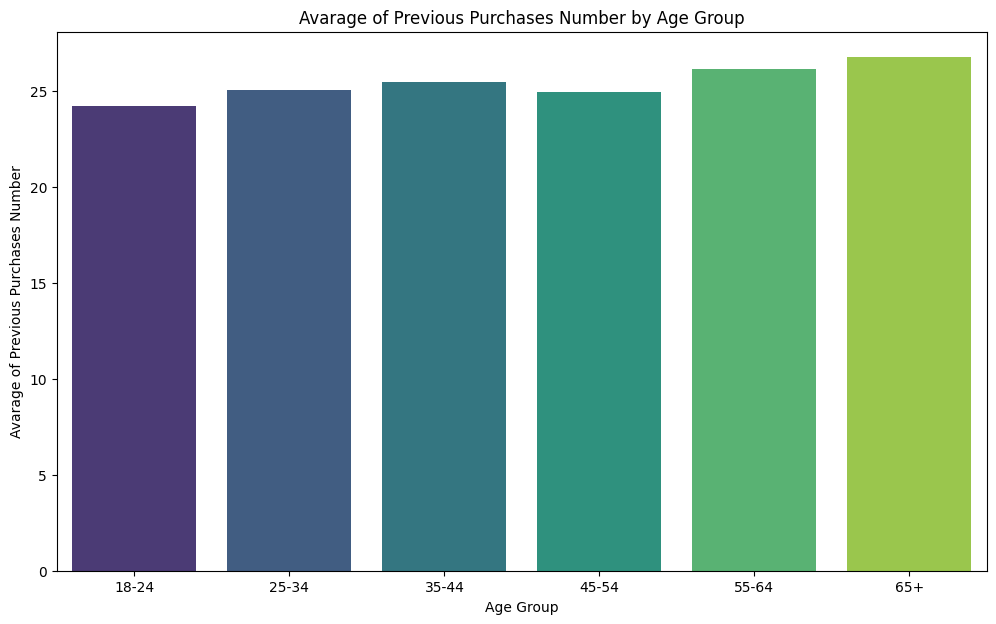

In [18]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Age_Group', y='Previous Purchases', data=avg_purchases_by_age_group, palette='viridis')
plt.title('Avarage of Previous Purchases Number by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avarage of Previous Purchases Number')
plt.show()


This graph show the lowest purchases number is on group age 18-24 and gradually increase according to age group. 

### 💸 Purchase by Gender

        Count  Percentage (%)
Gender                       
Male     2652            68.0
Female   1248            32.0


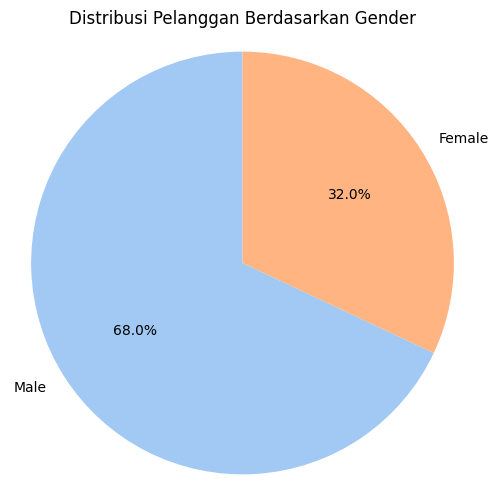

In [22]:
gender_counts = df['Gender'].value_counts()
gender_percentages = df['Gender'].value_counts(normalize=True)*100
summary = pd.DataFrame({'Count': gender_counts, 'Percentage (%)': gender_percentages.round(2)})
print(summary)

plt.figure(figsize=(6, 6))

# Membuat pie chart\
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel')) 

plt.title('Distribusi Pelanggan Berdasarkan Gender') 
plt.axis('equal')
plt.show()

In [24]:
# Create the pie chart
fig = px.pie(
    df,
    names='Gender',
    title='Distribusi Pelanggan Berdasarkan Gender',
    hole=0.3,  # Optional: makes it a donut chart (set to 0 for regular pie)
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Matches seaborn's pastel
    width=600,  # Adjust size
    height=600
)

# Add count and percentage to hover data
fig.update_traces(
    textinfo='percent+label',
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent:.1%}",
    marker=dict(line=dict(color='white', width=1)),  # White borders between segments
    rotation=90  # Matches your startangle=90
)

# Improve layout
fig.update_layout(
    uniformtext_minsize=12,  # Minimum font size
    uniformtext_mode='hide',  # Hide text if doesn't fit
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    title_x=0.5,  # Center title
    annotations=[dict(text='Customer<br>Distribution', x=0.5, y=0.5, font_size=16, showarrow=False)]
)

fig.show()

   Gender  Previous Purchases
0  Female           24.596154
1    Male           25.707014


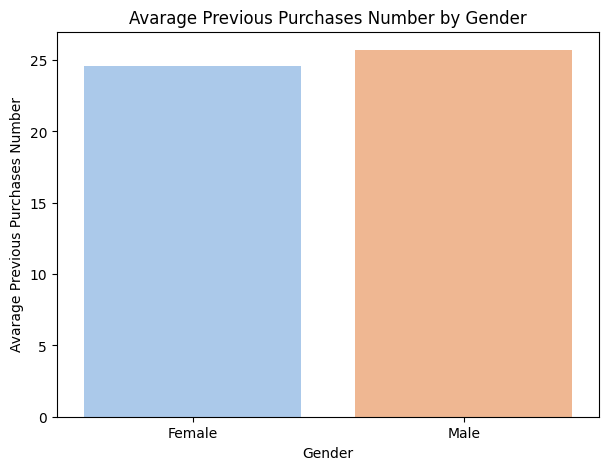

In [25]:
avg_purchases_by_gender = df.groupby('Gender')['Previous Purchases'].mean().reset_index()
print(avg_purchases_by_gender)

plt.figure(figsize=(7, 5))
sns.barplot(x='Gender', y='Previous Purchases', data=avg_purchases_by_gender, palette='pastel')
plt.title('Avarage Previous Purchases Number by Gender')
plt.xlabel('Gender')
plt.ylabel('Avarage Previous Purchases Number')
plt.show()

In [28]:
fig = px.bar(
    avg_purchases_by_gender,
    x='Gender',
    y='Previous Purchases',
    title='Average Previous Purchases by Gender',
    color='Gender',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text_auto='.2f'  # Shows values with 2 decimal places
)

# Customize the layout
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Average Previous Purchases Number',
    plot_bgcolor='white',
    title_x=0.5,  # Center the title
    hovermode="x unified",
    showlegend=False  # Since gender is already on x-axis
)

# Customize the bars
fig.update_traces(
    textposition='outside',
)

# Customize axes
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

fig.show()

This is an interesting finding: while the number of female customers is **less than half** the number of male customers, the average number of previous purchases for both genders is **nearly identical.**

----- Average Number of Previous Purchases per Age Group and Gender -----
Gender        Female       Male
Age_Group                      
18-24      22.973684  24.793413
25-34      25.294606  24.914397
35-44      25.034483  25.682093
45-54      23.456693  25.674699
55-64      25.139918  26.580709
65+        25.658730  26.694352


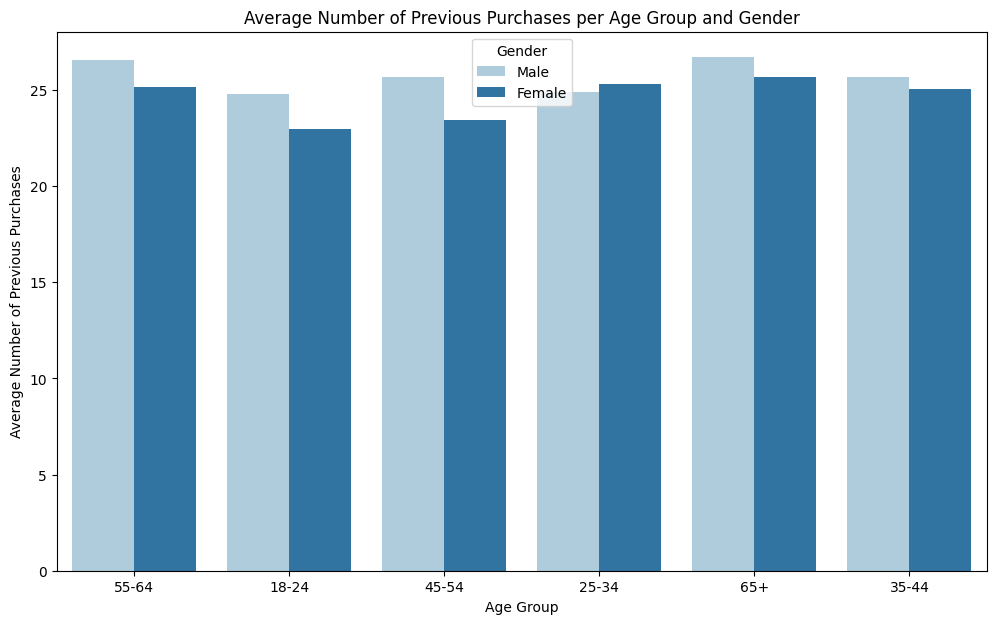

In [37]:
print("----- Average Number of Previous Purchases per Age Group and Gender -----")
avg_purchases_by_age_gender = df.groupby(['Age_Group', 'Gender'])['Previous Purchases'].mean().unstack()
print(avg_purchases_by_age_gender)

plt.figure(figsize=(12, 7))
sns.barplot(x='Age_Group', y='Previous Purchases', hue='Gender', data=df, ci=None, palette='Paired')
plt.title('Average Number of Previous Purchases per Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Previous Purchases')
plt.legend(title='Gender')
plt.show()

In [32]:
import plotly.express as px

# First ensure Age_Group is string type
df['Age_Group'] = df['Age_Group'].astype(str)

# Calculate averages
avg_purchases = df.groupby(['Age_Group', 'Gender'])['Previous Purchases'].mean().reset_index()

# Create plot with sorted age groups
fig = px.bar(
    avg_purchases,
    x='Age_Group',
    y='Previous Purchases',
    color='Gender',
    barmode='group',
    title='Average Previous Purchases by Age Group and Gender',
    color_continuous_scale="Plasma",
    text_auto='.2f',
)

# Customize layout
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Average Previous Purchases',
    plot_bgcolor='white',
    hovermode="x unified",
    legend_title_text='Gender'
)

# Customize bars
fig.update_traces(
    textposition='outside',
)

fig.show()

From this graph, we can observe that the number of male customers increases gradually with each successive age group. Meanwhile, the number of female customers shows variation in their average previous purchases across different age groups. Specifically, the Female 65+ age group exhibits the highest average number of previous purchases, while the Female 18-24 age group demonstrates the lowest average.

## 👨‍🦳 Demographic Analysis of Purchased Item Types

### The Most Popular Items by Age

   Age_Group     Category  count
0      18-24     Clothing    236
1      18-24  Accessories    142
2      18-24     Footwear     61
3      18-24    Outerwear     47
4      25-34     Clothing    340
5      25-34  Accessories    248
6      25-34     Footwear    115
7      25-34    Outerwear     52
8      35-44     Clothing    314
9      35-44  Accessories    249
10     35-44     Footwear    109
11     35-44    Outerwear     57
12     45-54     Clothing    325
13     45-54  Accessories    221
14     45-54     Footwear    139
15     45-54    Outerwear     67
16     55-64     Clothing    327
17     55-64  Accessories    236
18     55-64     Footwear    123
19     55-64    Outerwear     65
20       65+     Clothing    195
21       65+  Accessories    144
22       65+     Footwear     52
23       65+    Outerwear     36


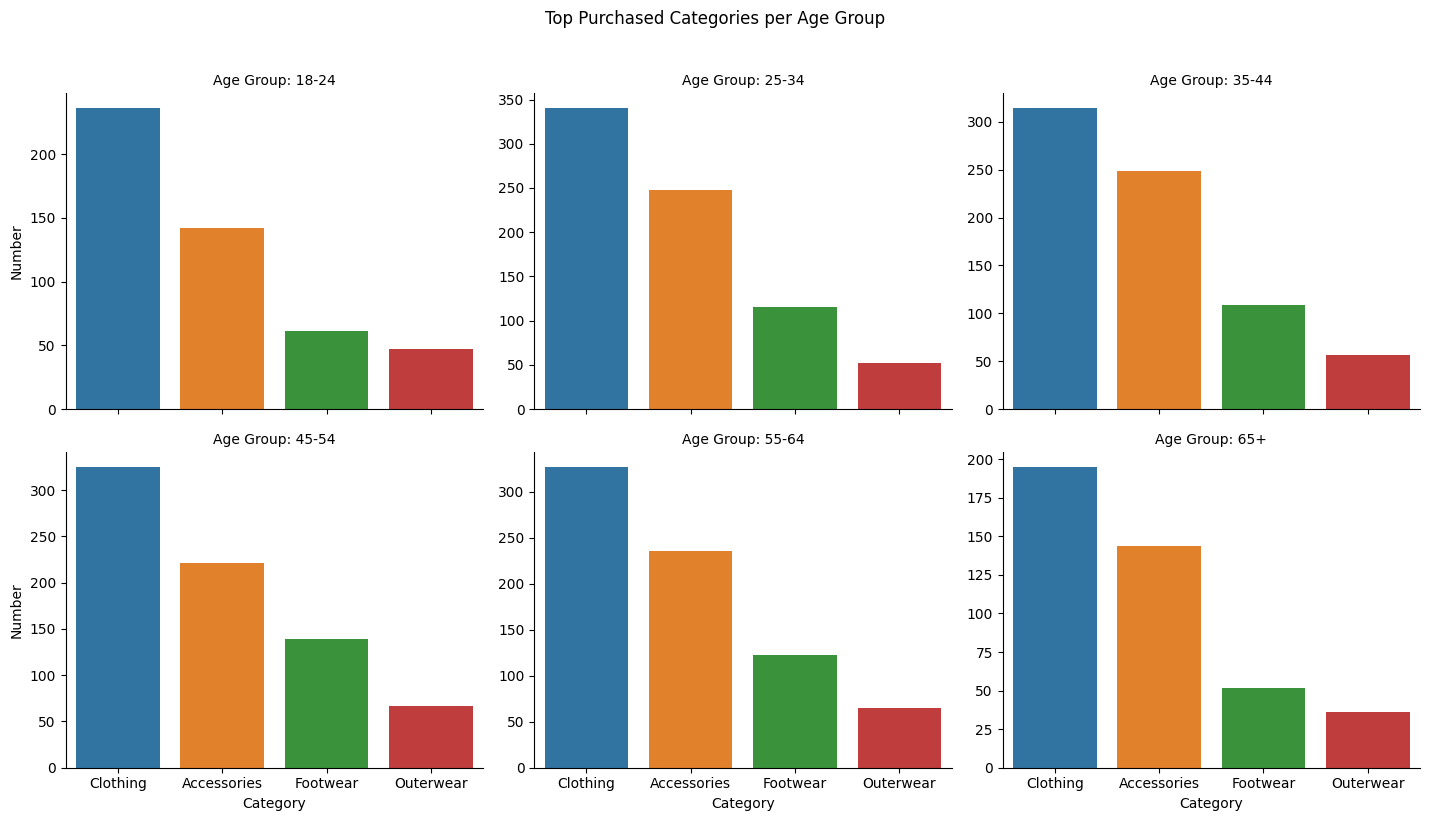

In [38]:
top_categories_by_age = df.groupby('Age_Group')['Category'].value_counts().groupby(level=0).head(5).reset_index(name='count')
print(top_categories_by_age)

g = sns.catplot(x='Category', y='count', col='Age_Group', data=top_categories_by_age,
                kind='bar', col_wrap=3, height=4, aspect=1.2, palette='tab10', sharey=False)
g.set_axis_labels("Category", "Number")
g.set_titles("Age Group: {col_name}")
plt.suptitle('Top Purchased Categories per Age Group', y=1.02)
plt.tight_layout()
plt.show()

In [53]:
import plotly.express as px

# Prepare the data (same as your original code)
top_categories_by_age = df.groupby('Age_Group')['Category'].value_counts().groupby(level=0).head(5).reset_index(name='count')

# Create interactive facet plot
fig = px.bar(
    top_categories_by_age,
    x='Category',
    y='count',
    facet_col='Age_Group',
    facet_col_wrap=3,
    color='Category',
    title='Top Purchased Categories per Age Group',
    labels={'count': 'Number of Purchases', 'Category': 'Product Category'},
    height=800,
    width = 1000,
    color_discrete_sequence=px.colors.qualitative.Set1,
    facet_col_spacing = 0.05,
    facet_row_spacing = 0.1
)

# Customize layout
fig.update_layout(
    showlegend=False,
    hovermode="x unified",
    title_x=0.5,
    margin=dict(t=100)  # Add space for title
)

# Customize facets
fig.update_xaxes(matches=None, showticklabels=True)  # Different x-axes per facet
fig.update_yaxes(matches=None, showticklabels=True)  # Different y-axes per facet
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Clean facet titles

fig.show()

Clothing is clearly the most purchased category across all age groups. This suggests that clothing represents either a fundamental need or a universal shopping preference within this dataset.

Accessories consistently rank second in terms of purchase volume across all age groups. Notably, for the 45-55 age group, accessories sold twice as much as footwear, indicating their substantial popularity among customers.

Conversely, the number of purchases for Footwear and Outerwear was significantly lower than that for Clothing and Accessories. While there's slight variation between these two categories in some age groups, the general purchasing pattern remains consistent.

### The Most Popular Items by Gender

Category  Accessories  Clothing  Footwear  Outerwear
Gender                                              
Female            392       556       199        101
Male              848      1181       400        223


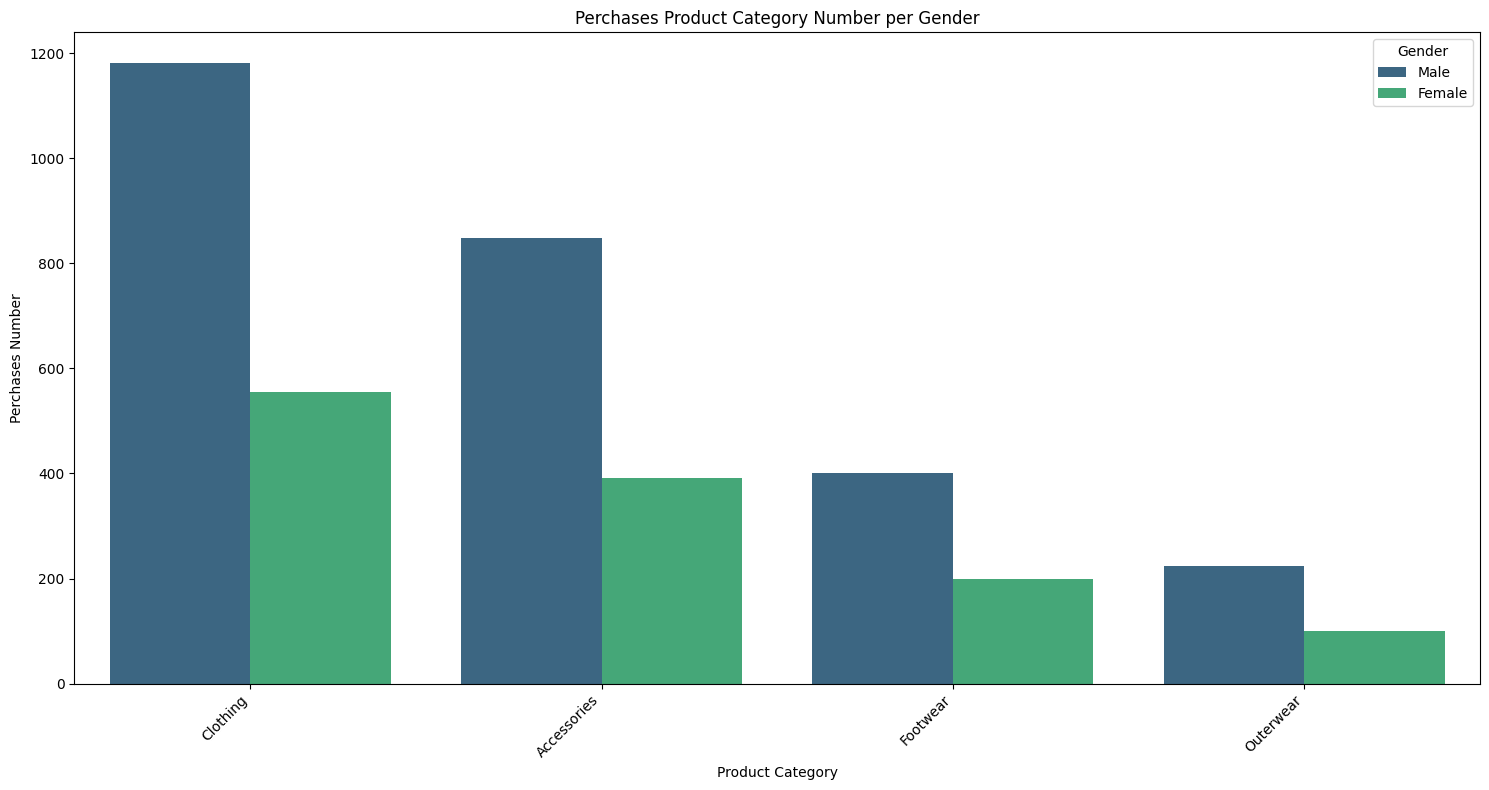

In [19]:
category_by_gender = df.groupby('Gender')['Category'].value_counts().unstack(fill_value=0)
print(category_by_gender.head())

category_gender_counts = df.groupby(['Gender', 'Category']).size().reset_index(name='count')
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='count', hue='Gender', data=category_gender_counts.sort_values(by='count', ascending=False), palette='viridis')
plt.title('Perchases Product Category Number per Gender')
plt.xlabel('Product Category')
plt.ylabel('Perchases Number')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [57]:
# Prepare the data (sorted by count in descending order)
category_gender_counts = df.groupby(['Gender', 'Category']).size().reset_index(name='count')
category_gender_counts = category_gender_counts.sort_values(by='count', ascending=False)

# Create interactive plot
fig = px.bar(
    category_gender_counts,
    x='Category',
    y='count',
    color='Gender',
    title='Product Category Purchases by Gender',
    labels={'count': 'Number of Purchases', 'Category': 'Product Category'},
    color_discrete_sequence=px.colors.qualitative.Set1,
    barmode='group',
    height=600,
    width=800
)

# Customize layout
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Number of Purchases',
    hovermode="x unified",
    legend_title_text='Gender',
    title_x=0.5,  # Center title
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='white'
)

# Customize axes
fig.update_xaxes(
    tickangle=45,
    tickfont=dict(size=10),
    categoryorder='total descending'  # Sort categories by total count
)

fig.update_yaxes(
    gridcolor='lightgrey'
)

# Customize bars
fig.update_traces(
    texttemplate='%{y}',  # Show values on bars
    textposition='outside'
)

# Add interactivity features
fig.update_layout(
    clickmode='event+select',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Add dropdown menu to switch view
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"barmode": "group"}],
                    label="Grouped View",
                    method="relayout"
                ),
                dict(
                    args=[{"barmode": "stack"}],
                    label="Stacked View",
                    method="relayout"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

fig.show()

For all product categories shown (Clothing, Accessories, Footwear, and Outerwear), male customers consistently purchase significantly more items than female customers. This trend reinforces findings from our previous analysis. Additionally, Clothing and Accessories remain the top two most popular categories across both genders.

### Cross-tabulation (Heatmap): Age, Gender, & Category

Category          Accessories  Clothing  Footwear  Outerwear
Age_Group Gender                                            
18-24     Female           48        71        17         16
          Male             94       165        44         31
25-34     Female           73       107        42         19
          Male            175       233        73         33
35-44     Female           76       110        34         12
          Male            173       204        75         45
45-54     Female           73       112        47         22
          Male            148       213        92         45
55-64     Female           74       102        45         22
          Male            162       225        78         43
65+       Female           48        54        14         10
          Male             96       141        38         26


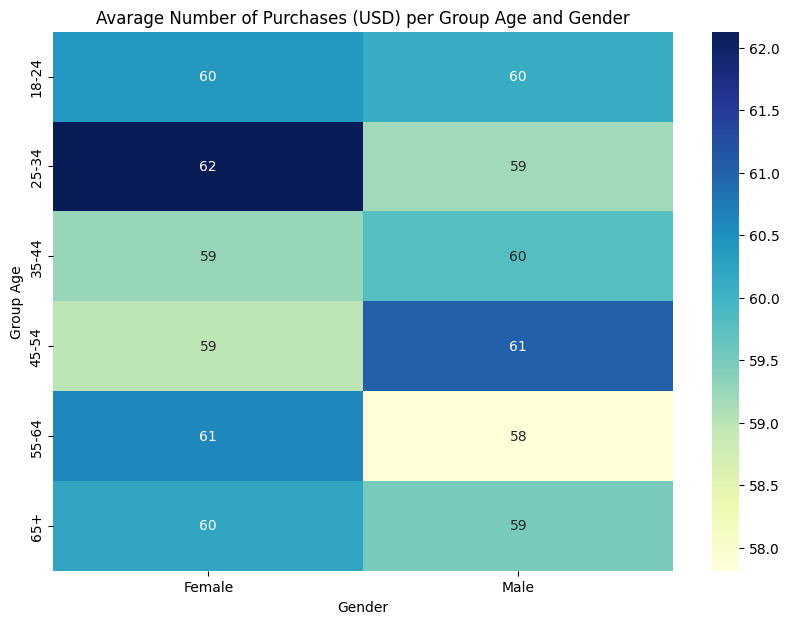

In [58]:
cross_tab_age_gender_category = pd.crosstab([df['Age_Group'], df['Gender']], df['Category'])
print(cross_tab_age_gender_category)

purchase_amount_pivot = df.pivot_table(values='Purchase Amount (USD)', index='Age_Group', columns='Gender', aggfunc='mean')
plt.figure(figsize=(10, 7))
sns.heatmap(purchase_amount_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Avarage Number of Purchases (USD) per Group Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Group Age')
plt.show()

In [59]:
# Prepare the data
purchase_amount_pivot = df.pivot_table(
    values='Purchase Amount (USD)', 
    index='Age_Group', 
    columns='Gender', 
    aggfunc='mean'
)

# Create interactive heatmap
fig = px.imshow(
    purchase_amount_pivot,
    labels=dict(x="Gender", y="Age Group", color="Amount (USD)"),
    x=purchase_amount_pivot.columns,
    y=purchase_amount_pivot.index,
    color_continuous_scale='YlGnBu',
    aspect="auto",
    title='Average Purchase Amount (USD) by Age Group and Gender'
)

# Customize layout
fig.update_layout(
    title_x=0.5,
    xaxis_title='Gender',
    yaxis_title='Age Group',
    height=600,
    width=800,
    margin=dict(l=100, r=100, t=100, b=100)
)

# Add annotations (cell values)
fig.update_traces(
    texttemplate="%{z:.0f}",
    textfont={"size":12},
    hovertemplate="<b>Age Group</b>: %{y}<br><b>Gender</b>: %{x}<br><b>Amount</b>: $%{z:.2f} USD<extra></extra>"
)

# Customize colorbar
fig.update_coloraxes(
    colorbar_title="Amount (USD)",
    colorbar_tickprefix="$",
    colorbar_thickness=20,
    colorbar_len=0.75
)

# Improve axis display
fig.update_xaxes(side="top")
fig.update_yaxes(autorange="reversed")  # Match seaborn's top-to-bottom order

fig.show()

From this Cross-tabulation, we get insight that the average number of purchases per transaction remains relatively stable and consistent across all age groups and genders. Most values hover around `$59`-`$61`. The lowest recorded average is `$58` (Female, 55-64), while the highest is `$62` (Female, 25-34).

This very small range of variation, just `$4`, indicates that despite observed differences in overall purchase volumes, the average dollar amount spent per transaction does not vary significantly.

It's noteworthy that this cross-tabulation confirms that :
* While male customers purchase a greater quantity of items, their average spending per transaction is on par with that of female customers. This suggests that female customers may be purchasing higher-priced individual items or fewer, more expensive items per transaction.
* Despite variations in purchase volume among age groups, the average transaction value demonstrates significant consistency. This implies that individuals in age groups with higher overall purchasing activity (e.g., 25-64) are not necessarily spending more money per individual transaction compared to other age groups.

## 🗺 Analysis of Shopping Behavior Across Locations

### 🔢 Customer Number per Location

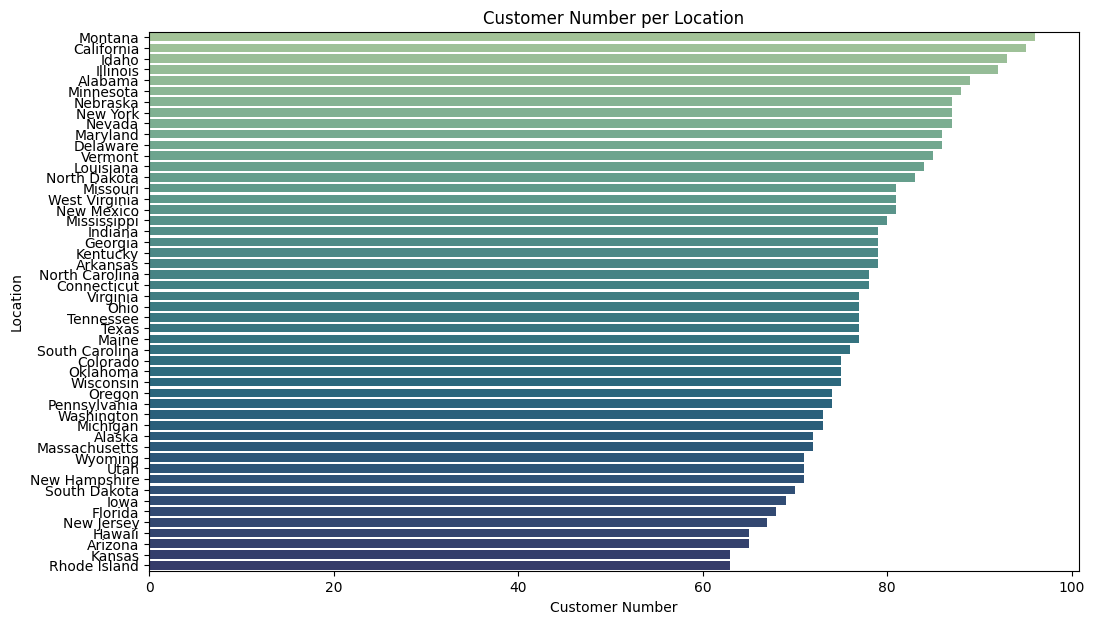

In [21]:
plt.figure(figsize=(12, 7))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index, palette='crest')
plt.title('Customer Number per Location')
plt.xlabel('Customer Number')
plt.ylabel('Location')
plt.show()

In [78]:
# Prepare the data
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Customer Count']

# Create interactive horizontal bar chart
fig = px.bar(
    location_counts,
    y='Location',
    x='Customer Count',
    orientation='h',
    title='Customer Distribution by Location',
    labels={'Customer Count': 'Number of Customers', 'Location': ''},
    color='Customer Count',
    color_continuous_scale='Viridis',
    width=900,
    height=1000
)

# Customize layout
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},  # Highest at top
    plot_bgcolor='white',
    title_x=0.5,
    hovermode='y unified',
    margin=dict(l=150)  # Extra space for long location names
)

# Customize bars
fig.update_traces(
    hovertemplate="<b>%{y}</b><br>Customers: %{x}<extra></extra>"
)

# Customize axes
fig.update_xaxes(
    title='Number of Customers',
    gridcolor='lightgrey'
)

fig.update_yaxes(
    title='Location',
)

# Add value labels
fig.update_traces(
    texttemplate='%{x}',
    textposition='outside',
)


fig.show()

From this chart, we get:
* States with the highest customer concentration include: Montana, California, Idaho, Illinois, and Alabama.
* Conversely, states with the lowest number of customers are: Rhode Island, New Jersey, Iowa, Florida, and New Hampshire.


### 💰 Average purchases by Location

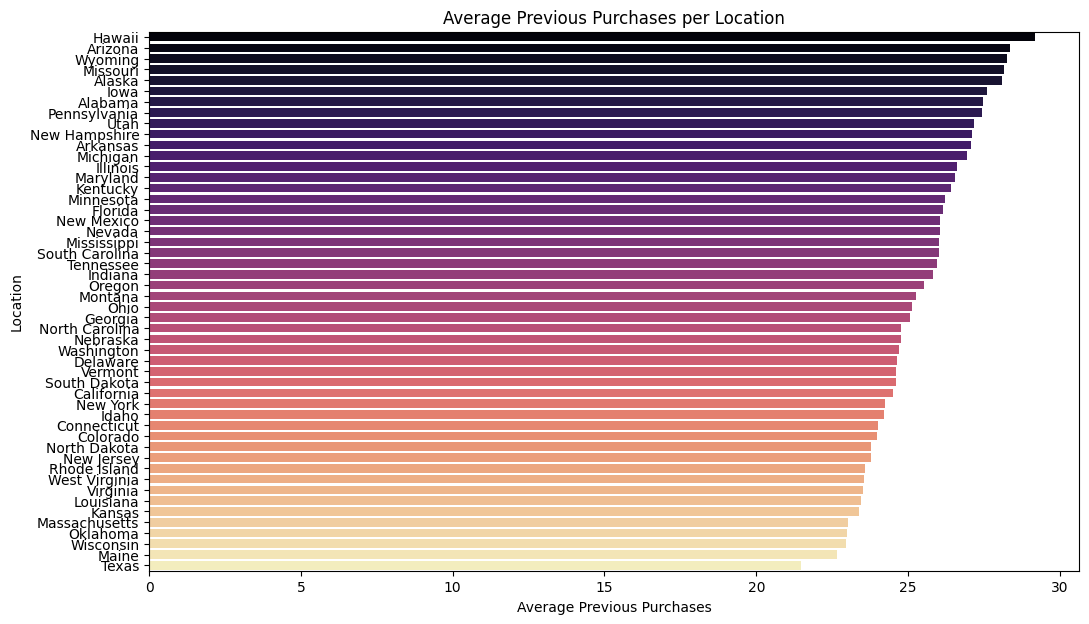

In [62]:
avg_purchases_by_location = df.groupby('Location')['Previous Purchases'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(y='Location', x='Previous Purchases', data=avg_purchases_by_location.sort_values(by='Previous Purchases', ascending=False), palette='magma')
plt.title('Average Previous Purchases per Location')
plt.xlabel('Average Previous Purchases')
plt.ylabel('Location')
plt.show()

In [75]:
# Prepare the data (sorted in descending order)
avg_purchases_by_location = df.groupby('Location')['Previous Purchases'].mean().reset_index()
avg_purchases_by_location = avg_purchases_by_location.sort_values('Previous Purchases', ascending=False)
# Create interactive horizontal bar chart
fig = px.bar(
    avg_purchases_by_location,
    y='Location',
    x='Previous Purchases',
    orientation='h',
    title='Average Previous Purchases by Location',
    labels={'Previous Purchases': 'Average Previous Purchases', 'Location': 'Location'},
    color='Previous Purchases',
    color_continuous_scale='Magma_r',
    width=900,
    height=1000
)

# Customize layout
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},  # Highest average at top
    plot_bgcolor='white',
    title_x=0.5,
    hovermode='y unified',
    margin=dict(l=150)  # Extra space for location names
)

# Customize bars
fig.update_traces(
    hovertemplate="<b>%{y}</b><br>Avg Purchases: %{x:.2f}<extra></extra>",
    texttemplate='%{x:.1f}',  # Show values with 1 decimal
    textposition='outside'
)

# Customize axes
fig.update_xaxes(
    title='Average Previous Purchases',
    gridcolor='lightgrey'
)

fig.update_yaxes(
    title='Location',
    tickfont=dict(size=12)
)

# Customize color scale
fig.update_coloraxes(
    colorbar_title="Avg Purchases",
    colorbar_thickness=15,
    colorbar_len=0.75
)

fig.show()

There's significant variation in the average purchase frequency per customer across different locations. Some states have customers who tend to shop more often than those in other locations.

Specifically:

* States with the highest average previous purchases per customer include: Hawaii, Arizona, Wyoming, Missouri, and Arkansas.
* Conversely, states with the lowest average previous purchases per customer are: Texas, Maine, Rhode Island, Oklahoma, Wisconsin, Kansas, and Massachusetts.

Interestingly, we found no direct correlation between the number of customers in a location and the average previous purchases per customer. This means states with a larger customer base don't necessarily exhibit higher average purchase frequencies.

It's important to note that locations with the highest number of customers (like Montana and California) don't necessarily have the highest average number of previous purchases. In fact, some states with a large customer base, such as California, fall in the middle range for average purchase frequency.

Conversely, locations with a high average number of previous purchases (like Hawaii and Arizona) don't always boast a massive customer count. Hawaii, for instance, isn't among the top states for overall customer volume.

## Interpretation and Summary



**Male Demographic Dominance in Dataset, Yet Similar Individual Shopping Behavior**

The dataset exhibits a significant bias, with 68% of customers identified as male and 32% as female. This context is vital for interpreting purchase volumes.

While males, in aggregate, make more unit purchases across all major categories (Clothing, Accessories, Footwear, Outerwear), further analysis indicates that the average number of previous purchases per individual shows no significant difference between males and females (approximately 24-26 previous purchases).

Similarly, the average monetary value per transaction remains highly consistent across all age groups and genders, at around $60. This suggests that overall volume differences are driven by customer count, rather than higher individual purchasing power or frequency from one gender.

**Clothing is the Dominant Category Across All Age Groups**

The Clothing category consistently ranks as the most purchased product across all age groups, followed by Accessories. This highlights the universal demand for both categories across diverse demographics.

Notably, the 25-64 age group shows a higher purchase volume compared to younger (18-24) or older (65+) groups, positioning them as a highly active market segment.

**Varied Shopping Behavior by Location Presents Strategic Opportunities**

There's a clear variation in the average purchase frequency per individual across different locations. Some areas, such as Hawaii and Arizona, exhibit a higher average number of previous purchases (approaching 30), indicating a more loyal or frequently interacting customer base.

Concurrently, the distribution of customer numbers also varies significantly by location, with Montana and California serving as examples of states with the largest customer bases.

However, it's critical to note that no direct correlation exists between locations with the highest customer counts and those with the highest average individual purchase frequency. This implies that a large market doesn't necessarily equate to the most frequent individual shoppers, and vice versa.

### **Business Implications**

* **Marketing & Inventory Strategy:** The primary focus should remain on Clothing and Accessories categories due to their consistent dominance across all demographics. Given the consistent average transaction value, businesses could explore pricing strategies that encourage purchase frequency or higher unit volumes per basket.

* **Smart Demographic Targeting:** Instead of solely focusing on aggregate volumes, which are skewed by customer count, businesses must recognize that individual shopping behavior (frequency and transaction value) is relatively uniform between genders. Marketing to males could prioritize new customer acquisition to expand the already large market base, while strategies for females could focus on enhancing engagement or cross-selling to increase wallet share.

* **Local Optimization:** The disparities in purchase frequency and customer numbers across locations open doors for tailored marketing strategies. High-frequency locations could be targeted for loyalty programs, whereas large customer bases with lower frequency might benefit from campaigns designed to encourage repeat purchases or deeper engagement.